<a href="https://colab.research.google.com/github/HiagoAD/GDI2/blob/master/Dengue%20x%20EMLURB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import calendar

In [122]:
dengue = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2020.csv", encoding ="UTF-8")
emlurb = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2020.csv", encoding ="UTF-8")

dengue19 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2019.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb19 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2019.csv", encoding ="UTF-8")


dengue18 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2018.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb18 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2018.csv", encoding ="UTF-8")

dengue17 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2017.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb17 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2017.csv", encoding ="UTF-8")


b'Skipping line 108: expected 126 fields, saw 127\nSkipping line 1485: expected 126 fields, saw 127\nSkipping line 2584: expected 126 fields, saw 127\nSkipping line 4415: expected 126 fields, saw 127\nSkipping line 5659: expected 126 fields, saw 127\nSkipping line 6469: expected 126 fields, saw 127\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Detalhamento de datasets**


In [123]:
emlurb.head()

,_id,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO
0,1,7,ARBORIZAÇÃO,8,PODA DE ARVORES,1TR JOSE MENEZES DE LYRA FILHO,34,DOIS UNIDOS,2,2020-07-08T00:00:00,ATENDIDA,2020-09-23T00:00:00
1,2,7,ARBORIZAÇÃO,8,PODA DE ARVORES,1TR VIRGILIO CAMPELO,85,MADALENA,4,2020-07-30T00:00:00,ATENDIDA,2020-08-07T00:00:00
2,3,7,ARBORIZAÇÃO,8,PODA DE ARVORES,1TR SANTA LUCIA,412,IPUTINGA,4,2020-09-10T00:00:00,ATENDIDA,2020-11-10T00:00:00
3,4,7,ARBORIZAÇÃO,8,PODA DE ARVORES,2TR REALEZA,776,SAO JOSE,1,2020-10-08T00:00:00,ATENDIDA,2020-12-10T00:00:00
4,5,7,ARBORIZAÇÃO,8,PODA DE ARVORES,2TR REALEZA,776,SAO JOSE,1,2020-12-14T00:00:00,ATENDIDA,2020-12-14T00:00:00


In [124]:
dengue.head()

,_id,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mani_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
0,1,3519899,2,A90,2020-06-26T00:00:00,202026,2020,26,261160,1497.0,28924,2020-06-26T00:00:00,202026,1972-06,2021,M,6,9,10.0,26,261160,1497,118.0,18.0,ROSARINHO,NaN,RUA AMARO COUTINHO,52041115.0,1.0,1,2020-06-26T00:00:00,141410.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3520984,2,A90,2020-06-22T00:00:00,202026,2020,26,261160,1497.0,6508960,2020-06-22T00:00:00,202026,1999-06,2001,F,6,9,10.0,26,261160,1497,119.0,43.0,CASA AMARELA,NaN,RUA XAVANTES,NaN,NaN,1,2020-06-22T00:00:00,NaN,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2020-07-14T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3479614,2,A90,2020-01-09T00:00:00,202002,2020,26,261160,1497.0,426,2020-01-04T00:00:00,202001,1990-05,4029,M,6,4,9.0,26,261160,1497,117.0,10.0,SANTO AMARO,NaN,RUA PRINCESA IZABEL,50050970.0,1.0,1,2020-01-09T00:00:00,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2020-03-09T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3511079,2,A90,2020-01-03T00:00:00,202001,2020,26,261160,1497.0,6657486,2019-12-31T00:00:00,202001,1980-10,4039,M,6,9,9.0,26,261160,1497,119.0,16.0,GRACAS,NaN,RUA DAS GRAAS,NaN,1.0,1,2020-01-03T00:00:00,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2020-01-30T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3551107,2,A90,2020-01-13T00:00:00,202003,2020,26,261160,1497.0,2352516,2020-01-01T00:00:00,202001,1957-10,4062,F,5,9,9.0,26,261160,1497,119.0,19.0,TAMARINEIRA,NaN,AVENIDA CONSELHEIRO ROSA E SILVA,NaN,1.0,1,2020-01-13T00:00:00,NaN,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2020-01-30T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Reorganização de Datasets e merge**

Como o data frame com dados de dengue é muito robusto, usaremos apenas as colunas que nos interessam. E estas são: bairro e data de registro do caso. Agrupamos os casos por mês e totalizamos as ocorrências mensais. Outras análise podem ser interessantes, como agrupamento por bairro e por dia.

 ## Dados de 2020


In [125]:
# Utilizamos apenas as colunas de bairro e de data do registro do caso

dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data['dt_notificacao'] = pd.to_datetime(dengue_data['dt_notificacao'])

# Número de casos por mês
dengue_data = dengue_data.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data = dengue_data.drop(dengue_data.index[[0]])

# Número de casos por bairro
# dengue_data.groupby("no_bairro_residencia").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# dengue_data["dt_notificacao"].value_counts().sort_values(ascending=False)

display(dengue_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,dt_notificacao,CASOS_DENGUE
1,2020-01-31,195
2,2020-02-29,182
3,2020-03-31,199
4,2020-04-30,69
5,2020-05-31,47
6,2020-06-30,207
7,2020-07-31,109


In [126]:
# Utilizamos apenas as colunas de bairro, data de demanda e tipo de serviço

emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

print("Número de solicitações de drenagem registradas em 2020 = " + str(len(emlurb_data.index)))

# Número de solicitações por mês
emlurb_data = emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")

# Número de casos por bairro
# emlurb_data.groupby("BAIRRO").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="D")]).size().sort_values(ascending=False).reset_index(name="CHAMADOS_EMLURB")

display(emlurb_data)

Número de solicitações de drenagem registradas em 2020 = 8340


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2020-01-31,675
1,2020-02-29,694
2,2020-03-31,902
3,2020-04-30,443
4,2020-05-31,500
5,2020-06-30,633
6,2020-07-31,950
7,2020-08-31,830
8,2020-09-30,798
9,2020-10-31,745


Agora que temos duas tabelas, **dengue_data**, com informação dos casos de dengue por mês, e **emlurb_data**, com informação dos pedidos de drenagem solicitados pela população por mês, faremos o merge das duas tabelas para unificar todos esses dados.


In [127]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])

display(crossed_info)

,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2020-01-31,195,2020-01-31,675
1,2020-02-29,182,2020-02-29,694
2,2020-03-31,199,2020-03-31,902
3,2020-04-30,69,2020-04-30,443
4,2020-05-31,47,2020-05-31,500
5,2020-06-30,207,2020-06-30,633
6,2020-07-31,109,2020-07-31,950


Com a tabela **crossed_info**, conseguimos reunir o número de casos de dengue e o número de chamados de drenagem por mês no grande Recife. Ainda podemos cruzar as informações com outros parâmetros como bairro, diária, status de solicitação etc.

## Dados de 2019 - 2017


Iremos fazer os mesmos tratamentos anteriores para os dados de 2019 até 2017.

2016 havia sido adicionado inicialmente, mas foi um ano atípico com uma média de 10x o número de casos mensais (chegando até 6000 casos por mês), decidimos não coloca-lo

In [128]:
# Utilizamos apenas as colunas de bairro e de data do registro do caso

dengue_data19 = dengue19[["no_bairro_residencia", "dt_notificacao"]]
dengue_data19['dt_notificacao'] = pd.to_datetime(dengue_data19['dt_notificacao'])

dengue_data18 = dengue18[["no_bairro_residencia", "dt_notificacao"]]
dengue_data18['dt_notificacao'] = pd.to_datetime(dengue_data18['dt_notificacao'])

dengue_data17 = dengue17[["no_bairro_residencia", "dt_notificacao"]]
dengue_data17['dt_notificacao'] = pd.to_datetime(dengue_data17['dt_notificacao'])

# Número de casos por mês
dengue_data19 = dengue_data19.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data19 = dengue_data19.drop(dengue_data19.index[[12,13]])

dengue_data18 = dengue_data18.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data18 = dengue_data18.drop(index=[12,13,14,15,16,17,18,19,20,21,22,23,24,25])


dengue_data17 = dengue_data17.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data17 = dengue_data17.drop(index=[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

display(dengue_data19)
display(dengue_data18)
display(dengue_data17)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,dt_notificacao,CASOS_DENGUE
0,2019-01-31,91
1,2019-02-28,178
2,2019-03-31,263
3,2019-04-30,485
4,2019-05-31,972
5,2019-06-30,704
6,2019-07-31,1004
7,2019-08-31,868
8,2019-09-30,966
9,2019-10-31,882


,dt_notificacao,CASOS_DENGUE
0,2018-01-31,73
1,2018-02-28,130
2,2018-03-31,151
3,2018-04-30,344
4,2018-05-31,419
5,2018-06-30,311
6,2018-07-31,263
7,2018-08-31,241
8,2018-09-30,166
9,2018-10-31,198


,dt_notificacao,CASOS_DENGUE
0,2017-01-31,169
1,2017-02-28,230
2,2017-03-31,333
3,2017-04-30,213
4,2017-05-31,273
5,2017-06-30,279
6,2017-07-31,115
7,2017-08-31,196
8,2017-09-30,190
9,2017-10-31,183


In [134]:
# Utilizamos apenas as colunas de bairro, data de demanda e tipo de serviço

emlurb_data19 = emlurb19[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data19["DATA_DEMANDA"] = pd.to_datetime(emlurb_data19["DATA_DEMANDA"])
emlurb_data19 = emlurb_data19[(emlurb_data19.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

emlurb_data18 = emlurb18[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data18["DATA_DEMANDA"] = pd.to_datetime(emlurb_data18["DATA_DEMANDA"])
emlurb_data18 = emlurb_data18[(emlurb_data18.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

emlurb_data17 = emlurb17[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data17 = emlurb_data17[(emlurb_data17.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data17["DATA_DEMANDA"] = pd.to_datetime(emlurb_data17["DATA_DEMANDA"])

# # Número de solicitações por mês
emlurb_data19 = emlurb_data19.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data18 = emlurb_data18.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data17 = emlurb_data17.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")

display(emlurb_data19)
display(emlurb_data18)
display(emlurb_data17)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2019-01-31,664
1,2019-02-28,950
2,2019-03-31,740
3,2019-04-30,1052
4,2019-05-31,1132
5,2019-06-30,933
6,2019-07-31,1018
7,2019-08-31,928
8,2019-09-30,884
9,2019-10-31,1049


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2018-01-31,727
1,2018-02-28,894
2,2018-03-31,1052
3,2018-04-30,1245
4,2018-05-31,980
5,2018-06-30,844
6,2018-07-31,811
7,2018-08-31,834
8,2018-09-30,732
9,2018-10-31,605


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2017-01-31,497
1,2017-02-28,491
2,2017-03-31,989
3,2017-04-30,804
4,2017-05-31,916
5,2017-06-30,1033
6,2017-07-31,1247
7,2017-08-31,1158
8,2017-09-30,719
9,2017-10-31,611


In [135]:
crossed_info19 = pd.merge(dengue_data19, emlurb_data19, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info19)

crossed_info18 = pd.merge(dengue_data18, emlurb_data18, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info18)

crossed_info17 = pd.merge(dengue_data17, emlurb_data17, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info17)

,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2019-01-31,91,2019-01-31,664
1,2019-02-28,178,2019-02-28,950
2,2019-03-31,263,2019-03-31,740
3,2019-04-30,485,2019-04-30,1052
4,2019-05-31,972,2019-05-31,1132
5,2019-06-30,704,2019-06-30,933
6,2019-07-31,1004,2019-07-31,1018
7,2019-08-31,868,2019-08-31,928
8,2019-09-30,966,2019-09-30,884
9,2019-10-31,882,2019-10-31,1049


,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2018-01-31,73,2018-01-31,727
1,2018-02-28,130,2018-02-28,894
2,2018-03-31,151,2018-03-31,1052
3,2018-04-30,344,2018-04-30,1245
4,2018-05-31,419,2018-05-31,980
5,2018-06-30,311,2018-06-30,844
6,2018-07-31,263,2018-07-31,811
7,2018-08-31,241,2018-08-31,834
8,2018-09-30,166,2018-09-30,732
9,2018-10-31,198,2018-10-31,605


,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2017-01-31,169,2017-01-31,497
1,2017-02-28,230,2017-02-28,491
2,2017-03-31,333,2017-03-31,989
3,2017-04-30,213,2017-04-30,804
4,2017-05-31,273,2017-05-31,916
5,2017-06-30,279,2017-06-30,1033
6,2017-07-31,115,2017-07-31,1247
7,2017-08-31,196,2017-08-31,1158
8,2017-09-30,190,2017-09-30,719
9,2017-10-31,183,2017-10-31,611


## **Testes de Hipótese**

O teste de hipótese é um método estatístico usado na tomada de decisões estatísticas usando dados de um conjunto. O teste de hipóteses é basicamente uma suposição que fazemos sobre o parâmetro do dataset.

Agora, ao realizar os t-test, normalmente se tem as seguintes duas hipóteses:

*   Hipóteses nulas: as médias de dois grupos são iguais
*   Hipóteses alternativas: as médias de dois grupos são diferentes (bicaudais)

In [138]:
#Testes de Hipótese para dados de 2020

crossed_info['mes'] = crossed_info.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['05', '06','07'] #meses de chuva 
dengue_data_meses = crossed_info[(crossed_info.mes.isin(meses_analise))]
dengue_data_meses['mes'] = pd.to_numeric(dengue_data_meses['mes'])

# Teste de hipótese para mês de Janeiro e Junho para casos de dengue
th_dengue = stats.ttest_ind(dengue_data_meses['CASOS_DENGUE'], dengue_data_meses['mes'], equal_var=True)
display(th_dengue)

# Teste de hipótese para mês de Janeiro e Junho para solicitações de drenagem
th_emlurb = stats.ttest_ind(dengue_data_meses['CHAMADOS_EMLURB'], dengue_data_meses['mes'], equal_var=True)
display(th_emlurb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ttest_indResult(statistic=2.4688876767532433, pvalue=0.06902913833408653)

Ttest_indResult(statistic=5.156991407515991, pvalue=0.0067119513666034115)

In [136]:
#Testes de Hipótese para dados de 2019-2017

crossed_info19['mes'] = crossed_info19.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data19_meses = crossed_info19[(crossed_info19.mes.isin(meses_analise))]
dengue_data19_meses['mes'] = pd.to_numeric(dengue_data19_meses['mes'])

crossed_info18['mes'] = crossed_info18.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data18_meses = crossed_info18[(crossed_info18.mes.isin(meses_analise))]
dengue_data18_meses['mes'] = pd.to_numeric(dengue_data18_meses['mes'])

crossed_info17['mes'] = crossed_info17.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data17_meses = crossed_info17[(crossed_info17.mes.isin(meses_analise))]
dengue_data17_meses['mes'] = pd.to_numeric(dengue_data17_meses['mes'])

# Teste de hipótese para mês de Janeiro e Junho para casos de dengue
th_dengue = stats.ttest_ind(dengue_data19_meses['CASOS_DENGUE'], dengue_data19_meses['mes'], equal_var=True)
display(th_dengue)

th_dengue = stats.ttest_ind(dengue_data18_meses['CASOS_DENGUE'], dengue_data18_meses['mes'], equal_var=True)
display(th_dengue)

th_dengue = stats.ttest_ind(dengue_data17_meses['CASOS_DENGUE'], dengue_data17_meses['mes'], equal_var=True)
display(th_dengue)

# Teste de hipótese para mês de Janeiro e Junho para solicitações de drenagem
th_emlurb = stats.ttest_ind(dengue_data19_meses['CHAMADOS_EMLURB'], dengue_data19_meses['mes'], equal_var=True)
display(th_emlurb)

th_emlurb = stats.ttest_ind(dengue_data18_meses['CHAMADOS_EMLURB'], dengue_data18_meses['mes'], equal_var=True)
display(th_emlurb)

th_emlurb = stats.ttest_ind(dengue_data17_meses['CHAMADOS_EMLURB'], dengue_data17_meses['mes'], equal_var=True)
display(th_emlurb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Ttest_indResult(statistic=2.2563777781667094, pvalue=0.06487016127243608)

Ttest_indResult(statistic=3.4164054485094, pvalue=0.014206333273019229)

Ttest_indResult(statistic=5.432858003969255, pvalue=0.0016131539532346245)

Ttest_indResult(statistic=11.381178797673211, pvalue=2.7575959515653668e-05)

Ttest_indResult(statistic=23.203777562371382, pvalue=4.2006444166494117e-07)

Ttest_indResult(statistic=4.2445097980257795, pvalue=0.005412785600605046)

O **p-value** é definido como a probabilidade de se
observar um valor da estatística de teste maior ou
igual ao encontrado. Tradicionalmente, o valor de corte
para rejeitar a hipótese nula é de 0,05, o que significa
que, quando não há nenhuma diferença, um valor tão
extremo para a estatística de teste é esperado em menos
de 5% das vezes

## **Correlações**

Fazer teste de Pearson/Spillman

## **Análise de Gráficos**

Analisaremos a tabela com dados cruzados, **crossed_info**. Coletando o número de casos de dengue e solicitações de drenagem por mês para os anos de 2020 a 2016. 

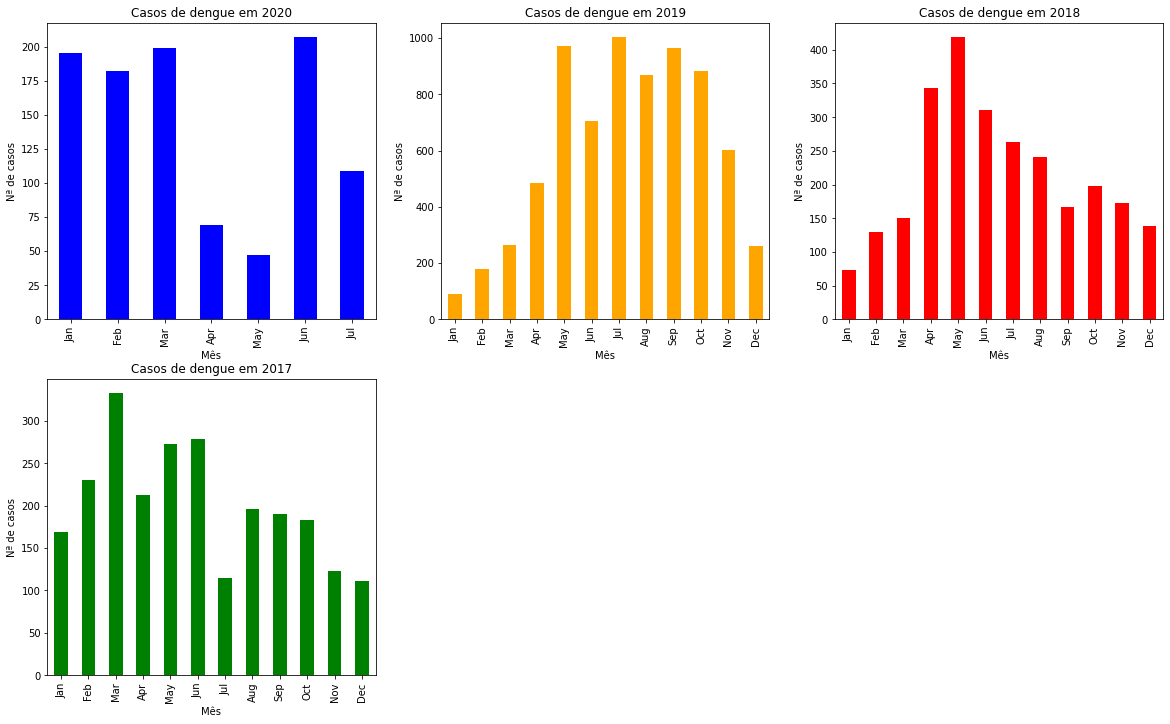

In [139]:
# Análise para Casos de dengue x Meses em 2019 e 2020

crossed_info['mes'] = pd.to_numeric(crossed_info['mes'])
crossed_info19['mes'] = pd.to_numeric(crossed_info19['mes'])
crossed_info18['mes'] = pd.to_numeric(crossed_info18['mes'])
crossed_info17['mes'] = pd.to_numeric(crossed_info17['mes'])

crossed_info['month'] = crossed_info['mes'].apply(lambda x: calendar.month_abbr[x])
crossed_info19['month'] = crossed_info19['mes'].apply(lambda x: calendar.month_abbr[x])
crossed_info18['month'] = crossed_info18['mes'].apply(lambda x: calendar.month_abbr[x])
crossed_info17['month'] = crossed_info17['mes'].apply(lambda x: calendar.month_abbr[x])


fig = plt.figure(1)
fig.set_figheight(12) 
fig.set_figwidth(20) 


ax1 = plt.subplot(231)
crossed_info.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax1,  title='Casos de dengue em 2020', color='blue', ylabel='Nª de casos', xlabel='Mês',)

ax2 = plt.subplot(232)
crossed_info19.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax2,title='Casos de dengue em 2019', color='orange', ylabel='Nª de casos', xlabel='Mês',)


ax3 = plt.subplot(233)
crossed_info18.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax3,title='Casos de dengue em 2018', color='red', ylabel='Nª de casos', xlabel='Mês',)


ax4 = plt.subplot(234)
crossed_info17.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax4,title='Casos de dengue em 2017', color='green', ylabel='Nª de casos', xlabel='Mês',)

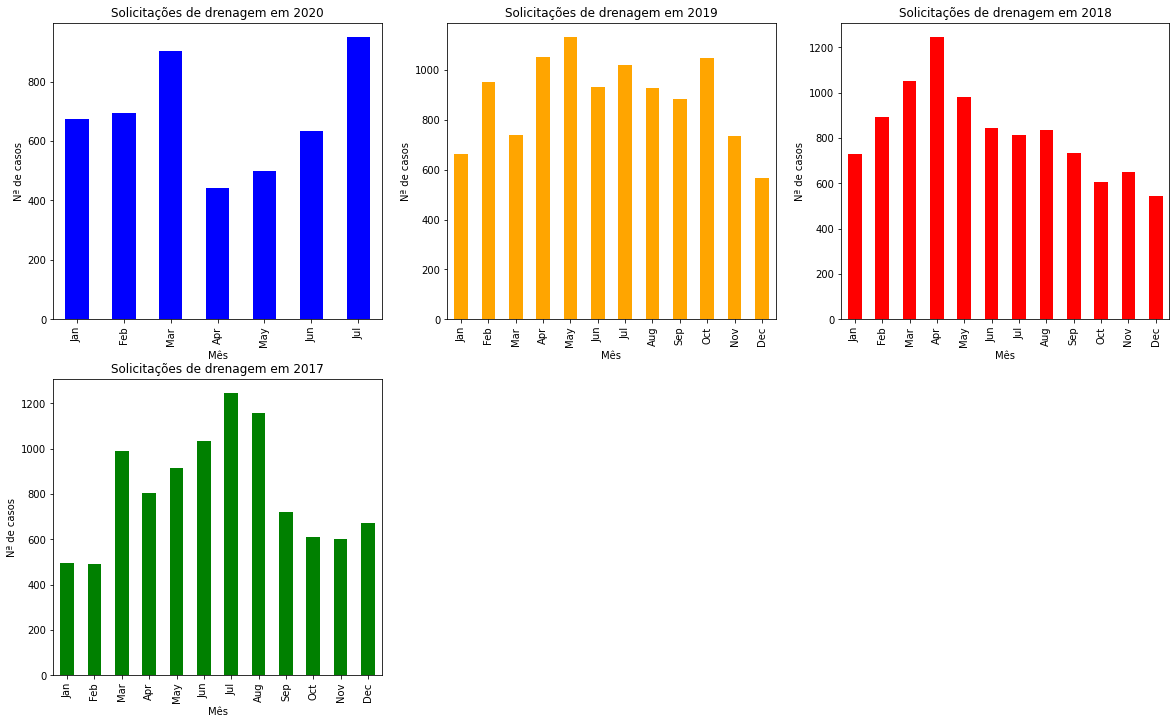

In [141]:
# Análise para Solicitações de drenagem x Meses em 2017 a 2020

fig = plt.figure(1)
fig.set_figheight(12) 
fig.set_figwidth(20) 

ax1 = plt.subplot(231)
crossed_info.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax1,  title='Solicitações de drenagem em 2020', color='blue', ylabel='Nª de casos', xlabel='Mês',)

ax2 = plt.subplot(232)
crossed_info19.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax2,title='Solicitações de drenagem em 2019', color='orange', ylabel='Nª de casos', xlabel='Mês',)

ax3 = plt.subplot(233)
crossed_info18.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax3,title='Solicitações de drenagem em 2018', color='red', ylabel='Nª de casos', xlabel='Mês',)

ax3 = plt.subplot(234)
crossed_info17.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax3,title='Solicitações de drenagem em 2017', color='green', ylabel='Nª de casos', xlabel='Mês',)

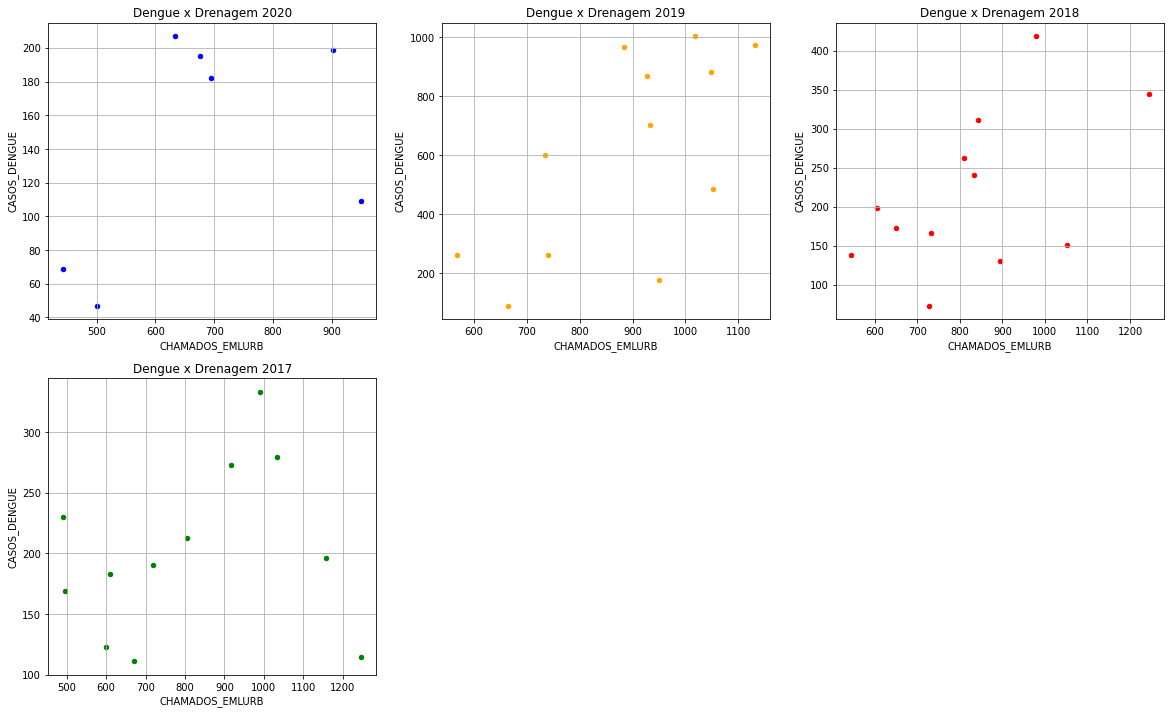

In [144]:
# Gráfico tipo scatter relacionando Casos dengue x Solicitações de drenagens em 2019 e 2020

fig = plt.figure(1)
fig.set_figheight(12) 
fig.set_figwidth(20) 

ax1 = plt.subplot(231)
crossed_info.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax1,  title='Dengue x Drenagem 2020', color='blue',grid=True)

ax2 = plt.subplot(232)
crossed_info19.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax2,title='Dengue x Drenagem 2019', color='orange',grid=True)

ax3 = plt.subplot(233)
crossed_info18.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax3,title='Dengue x Drenagem 2018', color='red',grid=True)

ax4 = plt.subplot(234)
crossed_info17.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax4,title='Dengue x Drenagem 2017', color='green',grid=True)

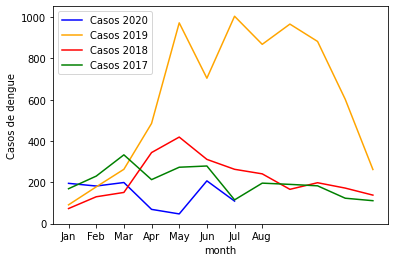

In [147]:
# Comparação de casos de dengue para anos de 2020 e 2019

ax = crossed_info.plot(x='month', y = 'CASOS_DENGUE', ylabel='Casos de dengue', xlabel='Mês', kind = 'line', color='blue', label='Casos 2020')
crossed_info19.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, color='orange', label='Casos 2019')
crossed_info18.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, color='red', label='Casos 2018')
crossed_info17.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, color='green', label='Casos 2017')

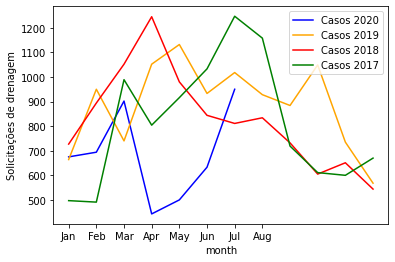

In [148]:
# Comparação de solicitações de drenagem para anos de 2020 e 2019

ax = crossed_info.plot(x='month', y = 'CHAMADOS_EMLURB', ylabel='Solicitações de drenagem', xlabel='Mês', kind = 'line', color='blue', label='Casos 2020')
crossed_info19.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, color='orange', label='Casos 2019')
crossed_info18.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, color='red', label='Casos 2018')
crossed_info17.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, color='green', label='Casos 2017')

## **Boxplots e Outliers**

O boxplot tem como objetivo estudar as medidas estatística do conjunto de dados, como variabilidade, média, e outliers.

   Date  Cases
0   jan    188
1   jan    285
2   jan     25
3   jan    310
4   feb    420
5   feb    100
6   feb    150
7   feb    264
8   mar    225
9   mar    421
10  mar    314
11  mar     12


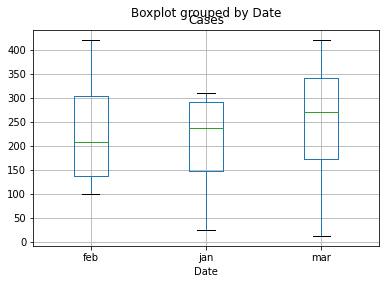

In [65]:
#agrupar casos mensais em diferentes anos

#4 anos
months=['jan', 'jan','jan', 'jan', 'feb', 'feb','feb', 'feb', 'mar', 'mar','mar', 'mar']
cases=[188, 285,25,310, 420, 100,150,264,225,421,314,12]

df = pd.DataFrame({'Date':months ,
                   'Cases': cases})

print(df)

df.boxplot(column=['Cases'],by="Date")



# **Análise de chamados de drenagem não atendidos pela EMLURB x Casos de Dengue**

In [66]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

IBURA            186
COHAB             63
AFOGADOS          31
AREIAS            31
BOA VIAGEM        31
                ... 
TORREAO            1
NOVO CAXANGA       1
VARZIA             1
JAQUEIRA           1
VASCO DA GOMA      1
Name: no_bairro_residencia, Length: 95, dtype: int64

In [67]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])

dengue_data = dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="CASOS_DENGUE")

dengue_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,no_bairro_residencia,dt_notificacao,CASOS_DENGUE
0,AFOGADOS,2020-01-13,1
1,AFOGADOS,2020-01-23,1
2,AFOGADOS,2020-01-24,2
3,AFOGADOS,2020-01-29,1
4,AFOGADOS,2020-02-03,1


In [68]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]

servicos = ["DRENAGEM"]
emlurb_data = emlurb_data[emlurb_data.GRUPOSERVICO_DESCRICAO.isin(servicos)]
emlurb_data = emlurb_data[(emlurb_data.SITUACAO != "ATENDIDA")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])

emlurb_data.head()

,GRUPOSERVICO_DESCRICAO,BAIRRO,DATA_DEMANDA,SITUACAO
12107,DRENAGEM,TORROES,2020-06-22,CADASTRADA
12108,DRENAGEM,VARZEA,2020-10-27,CADASTRADA
12109,DRENAGEM,MANGUEIRA,2020-08-24,CADASTRADA
12110,DRENAGEM,BOMBA DO HEMETERIO,2020-06-18,CADASTRADA
12111,DRENAGEM,DOIS UNIDOS,2020-03-11,CADASTRADA


In [69]:
emlurb_data = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()


,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFLITOS,2020-01-15,1
1,AFLITOS,2020-03-03,1
2,AFLITOS,2020-03-04,1
3,AFLITOS,2020-04-17,1
4,AFLITOS,2020-05-07,1


In [70]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

,no_bairro_residencia,dt_notificacao,CASOS_DENGUE,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFOGADOS,2020-01-13,1,AFOGADOS,2020-01-13,4
1,AFOGADOS,2020-01-23,1,AFOGADOS,2020-01-23,1
2,AFOGADOS,2020-01-29,1,AFOGADOS,2020-01-29,1
3,AFOGADOS,2020-02-03,1,AFOGADOS,2020-02-03,1
4,AFOGADOS,2020-02-05,4,AFOGADOS,2020-02-05,2


In [71]:
crossed_info.size

1374

In [72]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-0.8150945908464697, pvalue=0.4158687761557307)

Há **forte** correlação entre casos diários de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.

Próximos passos:
  * Analizar novamente casos gerais, porém na escala de um mês em vez de diária

## Estudo de gráficos (cenário 2)

Primeiro, analisamos as tabelas com os dados originais. Coletando o número de casos de dengue e solicitações de drenagem por bairro. Em seguida, utilizamos a tabela com informações cruzadas.

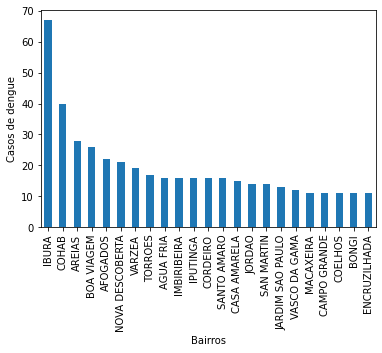

In [73]:
# Análise para Casos de dengue x Bairros (para mais de 10 casos de dengue)

dengue_filter = dengue_data.groupby("no_bairro_residencia").filter(lambda x: len(x) > 10)
dengue_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue', xlabel='Bairros')

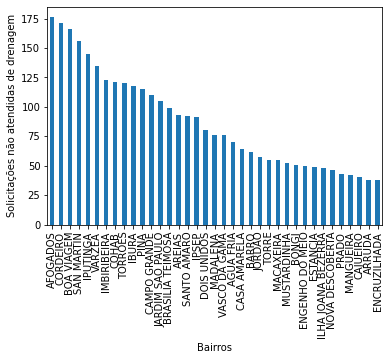

In [74]:
# Análise para Solicitações não atendidas de drenagem x Bairros (para mais de 35 chamados não atendidos)

emlurb_filter = emlurb_data.groupby("BAIRRO").filter(lambda x: len(x) > 35)
emlurb_filter['BAIRRO'].value_counts().plot(kind='bar', ylabel='Solicitações não atendidas de drenagem', xlabel='Bairros')

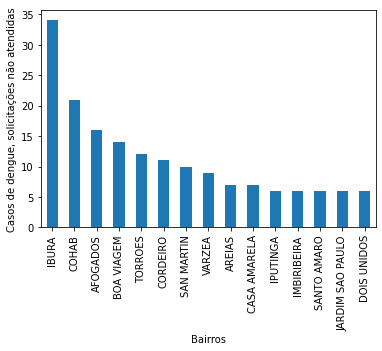

In [75]:
# Análise para Casos de dengue com solicitações não atendidas de drenagem x Bairros (mais de 5 casos)

crossed_info_filter = crossed_info.groupby("no_bairro_residencia").filter(lambda x: len(x) > 5)
crossed_info_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue, solicitações não atendidas', xlabel='Bairros')